## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from glob import glob

## 압축된 데이터셋 불러오기

In [2]:
df_final = pd.read_parquet('df_final.parquet.gzip')

In [3]:
df_final

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074790,2019-10-11 17:54:47+00:00,view,26400277,2053013563651392361,None,lucente,143.380005,514120202
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


In [4]:
df_final.shape

(42448763, 8)

In [5]:
df_final = df_final.drop_duplicates()
df_final = df_final.dropna()
df_final

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074788,2019-10-11 17:54:47+00:00,view,3601261,2053013563810775923,appliances.kitchen.washer,bosch,476.119995,515598105
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


## RFM 데이터 프레임 생성

In [6]:
df_final_pur = df_final[df_final['event_type'] == 'purchase']

In [7]:
df_final_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
7,2019-10-16 12:04:38+00:00,purchase,3601438,2053013563810775923,appliances.kitchen.washer,beko,203.410004,512935426
53,2019-10-16 12:04:39+00:00,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,195.619995,560839537
84,2019-10-16 12:04:41+00:00,purchase,1004834,2053013555631882655,electronics.smartphone,samsung,173.389999,545171410
178,2019-10-16 12:04:46+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1424.209961,514778102
193,2019-10-16 12:04:47+00:00,purchase,1801900,2053013554415534427,electronics.video.tv,samsung,483.459991,551965553
...,...,...,...,...,...,...,...,...
7074469,2019-10-11 17:54:34+00:00,purchase,1003235,2053013555631882655,electronics.smartphone,huawei,128.419998,559189082
7074484,2019-10-11 17:54:35+00:00,purchase,1005112,2053013555631882655,electronics.smartphone,apple,1003.849976,512404459
7074507,2019-10-11 17:54:35+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,1003.849976,540273893
7074511,2019-10-11 17:54:36+00:00,purchase,1002524,2053013555631882655,electronics.smartphone,apple,566.960022,533409964


In [8]:
last_timestamp = df_final_pur['event_time'].max() + dt.timedelta(days=1)

rfm = df_final_pur.groupby('user_id').agg({'event_time': lambda x : (last_timestamp - x.max()).days,
                                      'product_id' : 'count',
                                      'price' : 'sum'})

In [9]:
rfm['product_id'].value_counts()

1      149260
2       40571
3       15575
4        7774
5        4267
        ...  
71          1
143         1
130         1
202         1
121         1
Name: product_id, Length: 109, dtype: int64

In [10]:
rfm.head(2)

,event_time,product_id,price
user_id,,,
384989212,14,1,41.439999
401021311,11,1,231.639999


In [11]:
# 컬럼값 변경하기 
rfm.columns = ['recency', 'frequency', 'monetary']

array([[<AxesSubplot: title={'center': 'recency'}>,
        <AxesSubplot: title={'center': 'frequency'}>],
       [<AxesSubplot: title={'center': 'monetary'}>, <AxesSubplot: >]],
      dtype=object)

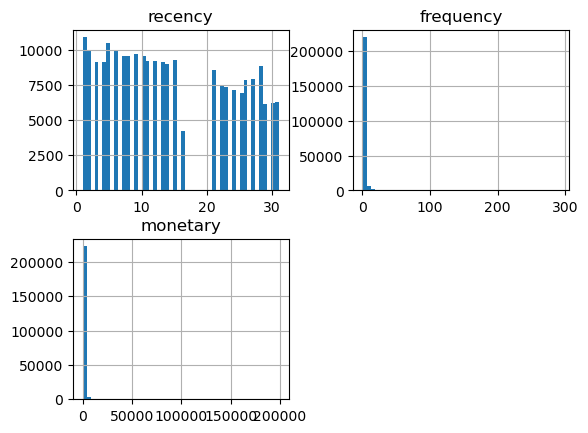

In [12]:
rfm.hist(bins=50)

In [13]:
# recency는 값이 낮을 수록 점수가 높다. 
# 최근에 구매한 고객이기 때문! 
list(range(5,0,-1))

[5, 4, 3, 2, 1]

In [14]:
# frequency와 monetary는 값이 높을 수록 높음
list(range(1,6))

[1, 2, 3, 4, 5]

In [15]:
r_labels = list(range(5,0,-1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))
cut_size = 5

In [16]:
# 상대적인 계산이 필요하므로 qcut()으로 진행 
r_cut = pd.qcut(rfm['recency'].rank(method='first'), cut_size, labels=r_labels)


In [17]:
f_cut = pd.qcut(rfm['frequency'].rank(method='first'), cut_size, labels=f_labels)

In [18]:
m_cut = pd.qcut(rfm['monetary'].rank(method='first'), cut_size, labels=m_labels)

In [19]:
rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)

In [20]:
rfm['rfm_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [21]:
rfm['rfm_score'] = rfm[['R','F','M']].sum(axis=1)

In [22]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score
user_id,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5
401021311,11,1,231.639999,3,1,3,313,7
403013066,14,2,807.160034,3,4,4,344,11
410333972,1,1,591.250000,5,1,4,514,10
415873351,1,2,263.059998,5,4,3,543,12
...,...,...,...,...,...,...,...,...
566265448,1,1,592.010010,5,4,4,544,13
566267483,1,2,30.740000,5,5,1,551,11
566270060,1,2,147.419998,5,5,2,552,12


<AxesSubplot: xlabel='rfm_segment', ylabel='rfm_score'>

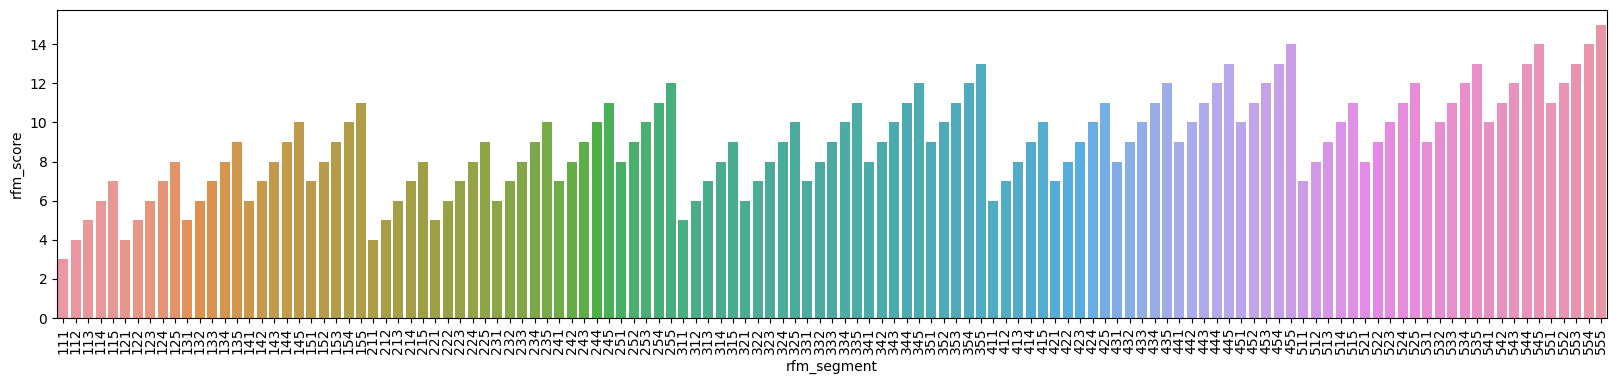

In [23]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('rfm_segment'), x='rfm_segment', y='rfm_score')

array([[<AxesSubplot: title={'center': 'recency'}>,
        <AxesSubplot: title={'center': 'frequency'}>],
       [<AxesSubplot: title={'center': 'monetary'}>,
        <AxesSubplot: title={'center': 'R'}>],
       [<AxesSubplot: title={'center': 'F'}>,
        <AxesSubplot: title={'center': 'M'}>]], dtype=object)

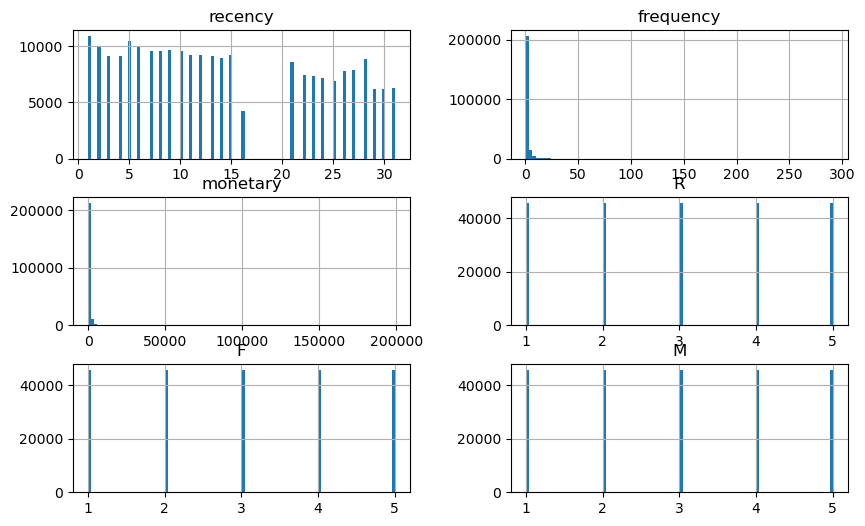

In [24]:
rfm.iloc[:, :-2].astype(float).hist(figsize=(10,6), bins=100)

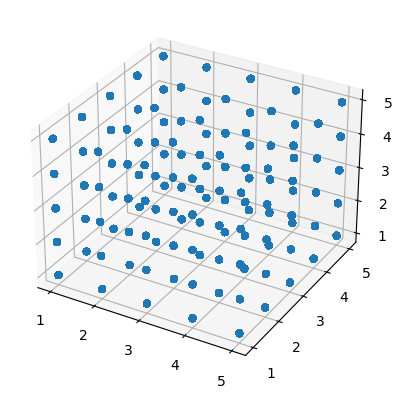

In [25]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['R'], rfm['F'], rfm['M'])

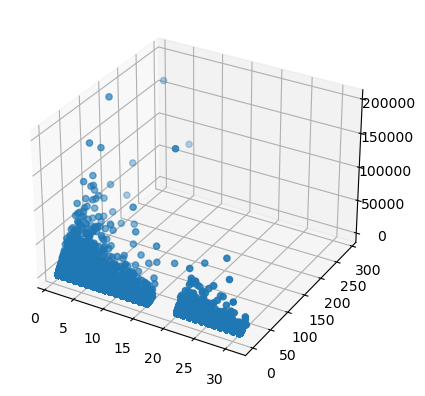

In [26]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['recency'], rfm['frequency'], rfm['monetary'])

In [27]:
rfm_table = rfm.groupby('rfm_score').agg({'recency':'mean',
                                          'frequency' : 'mean',
                                          'monetary' : ['mean', 'sum']})
rfm_table.style.background_gradient().format('{:,.0f}')


In [28]:
class_labels = ['silver', 'gold', 'platinum']

In [29]:
rfm['rfm_class'] = pd.qcut(rfm['rfm_score'], 3, labels=class_labels)
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5,silver
401021311,11,1,231.639999,3,1,3,313,7,silver
403013066,14,2,807.160034,3,4,4,344,11,platinum
410333972,1,1,591.250000,5,1,4,514,10,gold
415873351,1,2,263.059998,5,4,3,543,12,platinum
...,...,...,...,...,...,...,...,...,...
566265448,1,1,592.010010,5,4,4,544,13,platinum
566267483,1,2,30.740000,5,5,1,551,11,platinum
566270060,1,2,147.419998,5,5,2,552,12,platinum


In [30]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
# RFM_score에 따라 RFM_class 값이 잘 나뉘었는지 확인
rfm.groupby('rfm_class')['rfm_score'].describe()

,count,mean,std,min,25%,50%,75%,max
rfm_class,,,,,,,,
silver,80296.0,5.791359,1.155453,3.0,5.0,6.0,7.0,7.0
gold,75516.0,8.937735,0.816090,8.0,8.0,9.0,10.0,10.0
platinum,72581.0,12.614486,1.371641,11.0,11.0,12.0,14.0,15.0


<AxesSubplot: xlabel='rfm_class', ylabel='rfm_score'>

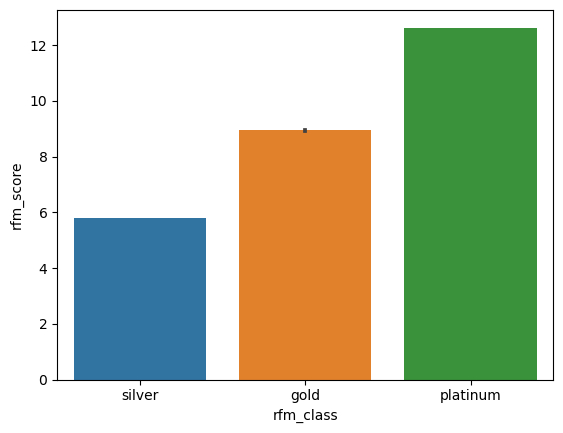

In [31]:
sns.barplot(data=rfm, x='rfm_class', y='rfm_score')

<AxesSubplot: xlabel='rfm_class', ylabel='rfm_score'>

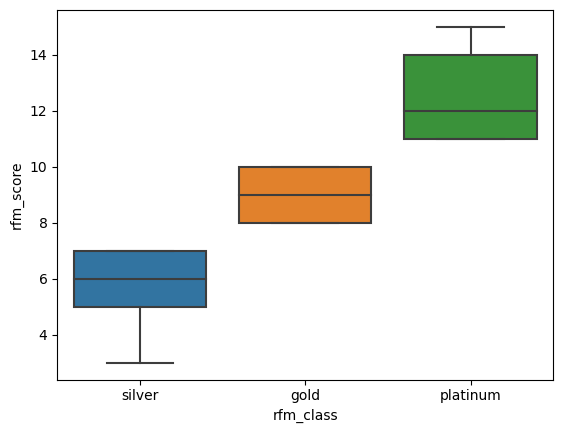

In [32]:
sns.boxplot(data=rfm, x='rfm_class', y='rfm_score')

<AxesSubplot: xlabel='R', ylabel='rfm_score'>

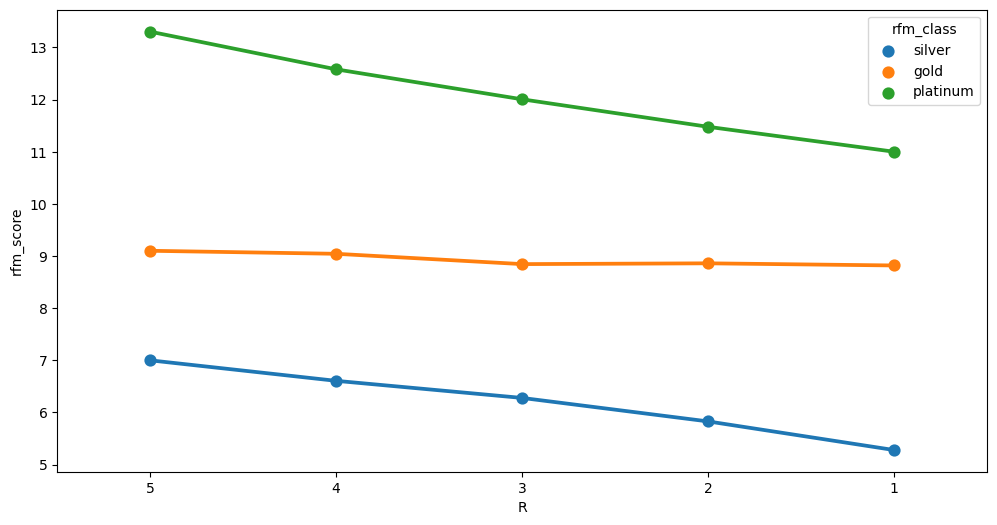

In [33]:
plt.figure(figsize=(12,6))
sns.pointplot(data=rfm, x='R', y='rfm_score', hue='rfm_class')

<AxesSubplot: xlabel='M', ylabel='rfm_score'>

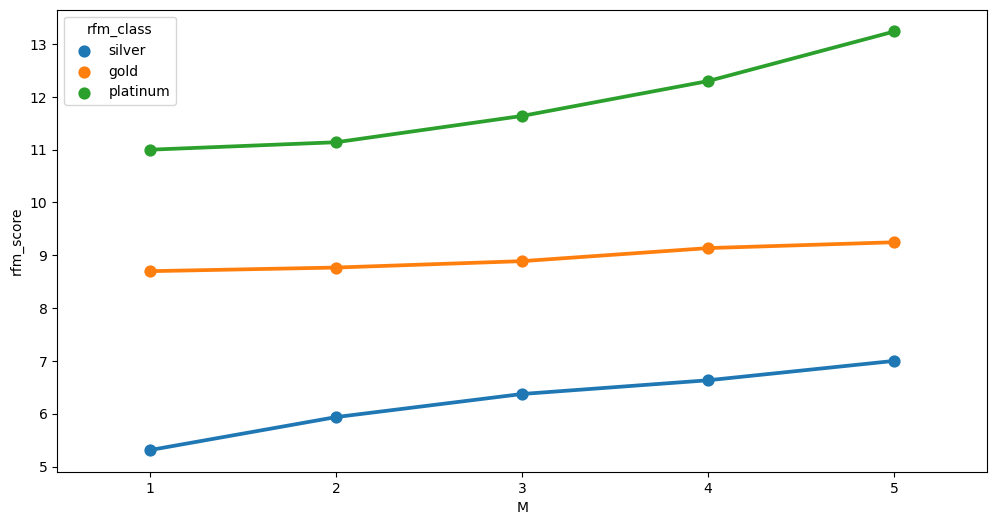

In [34]:
plt.figure(figsize=(12,6))
sns.pointplot(data=rfm, x='M', y='rfm_score', hue='rfm_class')

In [35]:
rfm.groupby('rfm_class').agg({'recency':'mean', 
                              'frequency':'mean',
                              'monetary':['mean', 'sum', 'count']}).style.background_gradient().format('{:,.0f}')

## 세부주제 분석 : 집단별 어떤 브랜드, 카테고리 제품의 푸시 알림을 보내는게 좋을까?

- R : 최근 접속한 고객 집단
- F : 얼마나 자주 구매한 고객집단 
- M : 매출액을 챙겨주는 고객집단 

In [36]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5,silver
401021311,11,1,231.639999,3,1,3,313,7,silver
403013066,14,2,807.160034,3,4,4,344,11,platinum
410333972,1,1,591.250000,5,1,4,514,10,gold
415873351,1,2,263.059998,5,4,3,543,12,platinum
...,...,...,...,...,...,...,...,...,...
566265448,1,1,592.010010,5,4,4,544,13,platinum
566267483,1,2,30.740000,5,5,1,551,11,platinum
566270060,1,2,147.419998,5,5,2,552,12,platinum


## 카테고리, 브랜드 파생변수 만들기 

In [37]:
df_final_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
7,2019-10-16 12:04:38+00:00,purchase,3601438,2053013563810775923,appliances.kitchen.washer,beko,203.410004,512935426
53,2019-10-16 12:04:39+00:00,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,195.619995,560839537
84,2019-10-16 12:04:41+00:00,purchase,1004834,2053013555631882655,electronics.smartphone,samsung,173.389999,545171410
178,2019-10-16 12:04:46+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1424.209961,514778102
193,2019-10-16 12:04:47+00:00,purchase,1801900,2053013554415534427,electronics.video.tv,samsung,483.459991,551965553
...,...,...,...,...,...,...,...,...
7074469,2019-10-11 17:54:34+00:00,purchase,1003235,2053013555631882655,electronics.smartphone,huawei,128.419998,559189082
7074484,2019-10-11 17:54:35+00:00,purchase,1005112,2053013555631882655,electronics.smartphone,apple,1003.849976,512404459
7074507,2019-10-11 17:54:35+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,1003.849976,540273893
7074511,2019-10-11 17:54:36+00:00,purchase,1002524,2053013555631882655,electronics.smartphone,apple,566.960022,533409964


In [38]:
split_col = df_final_pur['category_code'].str.split('.')

In [39]:
new_col = split_col.str[0]

In [40]:
df_final_pur['category'] = new_col
df_final_pur

/var/folders/yq/x6k6x6pn1799dnrdtwkc2y3c0000gn/T/ipykernel_42618/3054020905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_pur['category'] = new_col


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category
7,2019-10-16 12:04:38+00:00,purchase,3601438,2053013563810775923,appliances.kitchen.washer,beko,203.410004,512935426,appliances
53,2019-10-16 12:04:39+00:00,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,195.619995,560839537,electronics
84,2019-10-16 12:04:41+00:00,purchase,1004834,2053013555631882655,electronics.smartphone,samsung,173.389999,545171410,electronics
178,2019-10-16 12:04:46+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1424.209961,514778102,electronics
193,2019-10-16 12:04:47+00:00,purchase,1801900,2053013554415534427,electronics.video.tv,samsung,483.459991,551965553,electronics
...,...,...,...,...,...,...,...,...,...
7074469,2019-10-11 17:54:34+00:00,purchase,1003235,2053013555631882655,electronics.smartphone,huawei,128.419998,559189082,electronics
7074484,2019-10-11 17:54:35+00:00,purchase,1005112,2053013555631882655,electronics.smartphone,apple,1003.849976,512404459,electronics
7074507,2019-10-11 17:54:35+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,1003.849976,540273893,electronics
7074511,2019-10-11 17:54:36+00:00,purchase,1002524,2053013555631882655,electronics.smartphone,apple,566.960022,533409964,electronics


In [41]:
rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class
user_id,,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5,silver
401021311,11,1,231.639999,3,1,3,313,7,silver
403013066,14,2,807.160034,3,4,4,344,11,platinum
410333972,1,1,591.250000,5,1,4,514,10,gold
415873351,1,2,263.059998,5,4,3,543,12,platinum
...,...,...,...,...,...,...,...,...,...
566265448,1,1,592.010010,5,4,4,544,13,platinum
566267483,1,2,30.740000,5,5,1,551,11,platinum
566270060,1,2,147.419998,5,5,2,552,12,platinum


In [42]:
df_final_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category
7,2019-10-16 12:04:38+00:00,purchase,3601438,2053013563810775923,appliances.kitchen.washer,beko,203.410004,512935426,appliances
53,2019-10-16 12:04:39+00:00,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,195.619995,560839537,electronics
84,2019-10-16 12:04:41+00:00,purchase,1004834,2053013555631882655,electronics.smartphone,samsung,173.389999,545171410,electronics
178,2019-10-16 12:04:46+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1424.209961,514778102,electronics
193,2019-10-16 12:04:47+00:00,purchase,1801900,2053013554415534427,electronics.video.tv,samsung,483.459991,551965553,electronics
...,...,...,...,...,...,...,...,...,...
7074469,2019-10-11 17:54:34+00:00,purchase,1003235,2053013555631882655,electronics.smartphone,huawei,128.419998,559189082,electronics
7074484,2019-10-11 17:54:35+00:00,purchase,1005112,2053013555631882655,electronics.smartphone,apple,1003.849976,512404459,electronics
7074507,2019-10-11 17:54:35+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,1003.849976,540273893,electronics
7074511,2019-10-11 17:54:36+00:00,purchase,1002524,2053013555631882655,electronics.smartphone,apple,566.960022,533409964,electronics


In [43]:
df_final_pur['category'].value_counts()

electronics     348069
appliances       57942
computers        22206
auto              6417
apparel           5271
construction      4423
kids              3741
furniture         3277
accessories       1176
sport              844
medicine           250
stationery          91
country_yard        51
Name: category, dtype: int64

In [44]:
rfm_category = rfm.merge(df_final_pur[['category', 'user_id', 'brand']], on='user_id')
rfm_category

,user_id,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class,category,brand
0,384989212,14,1,41.439999,3,1,1,311,5,silver,appliances,artel
1,401021311,11,1,231.639999,3,1,3,313,7,silver,electronics,artel
2,403013066,14,2,807.160034,3,4,4,344,11,platinum,electronics,samsung
3,403013066,14,2,807.160034,3,4,4,344,11,platinum,electronics,apple
4,410333972,1,1,591.250000,5,1,4,514,10,gold,electronics,apple
...,...,...,...,...,...,...,...,...,...,...,...,...
453753,566267483,1,2,30.740000,5,5,1,551,11,platinum,computers,x-game
453754,566270060,1,2,147.419998,5,5,2,552,12,platinum,electronics,samsung
453755,566270060,1,2,147.419998,5,5,2,552,12,platinum,appliances,hansa
453756,566274637,1,1,2011.630005,5,4,5,545,14,platinum,electronics,apple


## 카테고리 분석

### R 값 중 가장 큰 3개 카테고리 비교

In [45]:
r_category = pd.pivot_table(data=rfm_category, index='R', columns='category', values='frequency', aggfunc='sum')
r_columns_mean = r_category.mean()
r_sorted_columns = r_columns_mean.sort_values(ascending=False)
r_category = r_category[r_sorted_columns.index]
r_category_3 = r_category.iloc[:,:3]

In [46]:
r_category_3

category,electronics,appliances,computers
R,,,
5,1641189,126721,83064
4,508728,58038,25412
3,270955,33617,15647
2,246825,24655,14295
1,130624,17556,7176


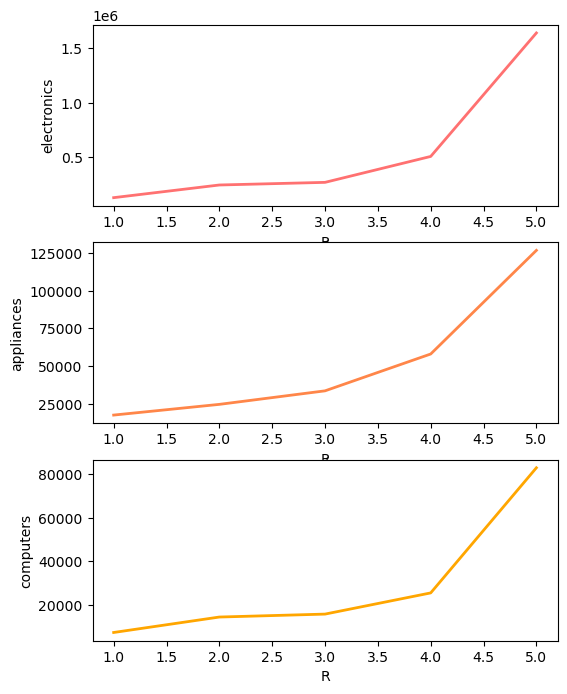

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(r_category_3['electronics'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(r_category_3['appliances'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(r_category_3['computers'], ax=axes[2], color='#ffa600', linewidth='2');

- electronics, appliances, computers는 R값이 증가할 수 록 구매 횟수가 많다. 

### F 값 중 가장 큰 3개 카테고리 비교

In [48]:
f_category = pd.pivot_table(data=rfm_category, index='F', columns='category', values='frequency', aggfunc='sum')
f_columns_mean = f_category.mean()
f_sorted_columns = f_columns_mean.sort_values(ascending=False)
f_category = f_category[f_sorted_columns.index]
f_category_3 = f_category.iloc[:,:3]

In [49]:
f_category_3

category,electronics,appliances,computers
F,,,
1,30520,8690,2508
2,32076,7879,2382
3,34238,6641,1989
4,107501,22072,7076
5,2593986,215305,131639


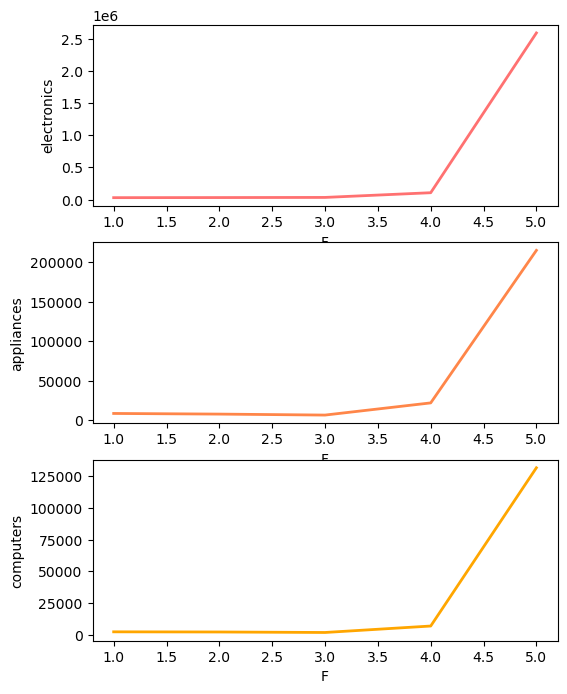

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(f_category_3['electronics'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(f_category_3['appliances'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(f_category_3['computers'], ax=axes[2], color='#ffa600', linewidth='2');

- 구매건수가 높은 3가지 항목 모두 우상향을 보여줍니다. 

### M 값 중 가장 큰 3개 카테고리 비교

In [51]:
m_category = pd.pivot_table(data=rfm_category, index='M', columns='category', values='frequency', aggfunc='sum')
m_columns_mean = m_category.mean()
m_sorted_columns = m_columns_mean.sort_values(ascending=False)
m_category = m_category[m_sorted_columns.index]
m_category_3 = m_category.iloc[:,:3]

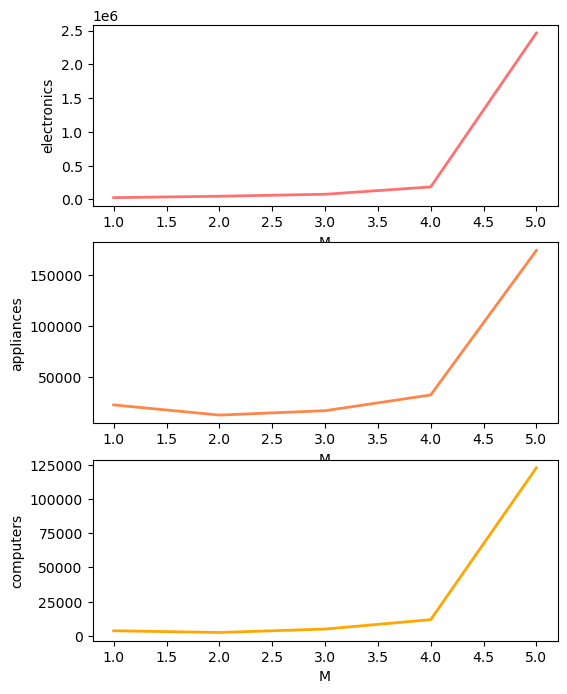

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(m_category_3['electronics'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(m_category_3['appliances'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(m_category_3['computers'], ax=axes[2], color='#ffa600', linewidth='2');

- electornics와 computers appliances 모두 우상향을 보여준다

### RFM class로 비교

In [53]:
rfm_category

,user_id,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class,category,brand
0,384989212,14,1,41.439999,3,1,1,311,5,silver,appliances,artel
1,401021311,11,1,231.639999,3,1,3,313,7,silver,electronics,artel
2,403013066,14,2,807.160034,3,4,4,344,11,platinum,electronics,samsung
3,403013066,14,2,807.160034,3,4,4,344,11,platinum,electronics,apple
4,410333972,1,1,591.250000,5,1,4,514,10,gold,electronics,apple
...,...,...,...,...,...,...,...,...,...,...,...,...
453753,566267483,1,2,30.740000,5,5,1,551,11,platinum,computers,x-game
453754,566270060,1,2,147.419998,5,5,2,552,12,platinum,electronics,samsung
453755,566270060,1,2,147.419998,5,5,2,552,12,platinum,appliances,hansa
453756,566274637,1,1,2011.630005,5,4,5,545,14,platinum,electronics,apple


In [54]:
class_category = pd.pivot_table(data=rfm_category, index='rfm_class',columns='category', values='frequency', aggfunc='sum')

In [55]:
class_category.style.background_gradient(cmap='Oranges')

category,accessories,apparel,appliances,auto,computers,construction,country_yard,electronics,furniture,kids,medicine,sport,stationery
rfm_class,,,,,,,,,,,,,
silver,479,1734,19756,2730,4130,1841,26,53329,1010,1533,159,216,48
gold,619,2629,26634,3025,8042,1790,23,112128,1438,2082,132,323,114
platinum,4940,19691,214197,17300,133422,10773,60,2632864,10044,11490,420,3700,87


- 위 시각화를 보면 어떤 rfm class에 따라 어떤 카테고리의 구매율이 높은 지 볼 수 있습니다. 
- rfm_class 중 플레티넘 클래스는 대부분 구매건수가 높고 stationery의 경우에만 골드회원이 더 높았습니다. 

## 브랜드 분석

In [56]:
rfm_category

,user_id,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,rfm_class,category,brand
0,384989212,14,1,41.439999,3,1,1,311,5,silver,appliances,artel
1,401021311,11,1,231.639999,3,1,3,313,7,silver,electronics,artel
2,403013066,14,2,807.160034,3,4,4,344,11,platinum,electronics,samsung
3,403013066,14,2,807.160034,3,4,4,344,11,platinum,electronics,apple
4,410333972,1,1,591.250000,5,1,4,514,10,gold,electronics,apple
...,...,...,...,...,...,...,...,...,...,...,...,...
453753,566267483,1,2,30.740000,5,5,1,551,11,platinum,computers,x-game
453754,566270060,1,2,147.419998,5,5,2,552,12,platinum,electronics,samsung
453755,566270060,1,2,147.419998,5,5,2,552,12,platinum,appliances,hansa
453756,566274637,1,1,2011.630005,5,4,5,545,14,platinum,electronics,apple


### R 값 중 가장 큰 3개 카테고리 비교

In [57]:
r_brand = pd.pivot_table(data=rfm_category, index='R', columns='brand', values='frequency', aggfunc='sum')
r_columns_mean = r_brand.mean()
r_sorted_columns = r_columns_mean.sort_values(ascending=False)
r_brand = r_brand[r_sorted_columns.index]
r_brand_3 = r_brand.iloc[:,:3]

In [58]:
r_brand

brand,samsung,apple,xiaomi,huawei,lg,oppo,acer,artel,lenovo,indesit,...,jack,kakadu,ken,telefunken,kiddy,kona,teamgroup,tanglewood,liebherr,kampfer
R,,,,,,,,,,,,,,,,,,,,,
5,666311,667990,129645,56910,54598,26261,23665,24201,16676,8593,...,0,0,0,1,1,0,1,0,0,0
4,257738,161726,39068,18747,8083,9363,7043,3483,4577,7404,...,1,0,0,0,0,1,0,0,0,0
3,105779,96960,27004,12570,3709,6593,4699,2065,2218,2467,...,0,1,0,0,0,0,0,1,1,1
2,100648,81899,27653,13700,3461,4829,2771,2098,2929,1849,...,0,0,0,0,0,0,0,0,0,0
1,50777,46062,15396,8288,2287,2760,1977,1528,1242,1009,...,0,0,1,0,0,0,0,0,0,0


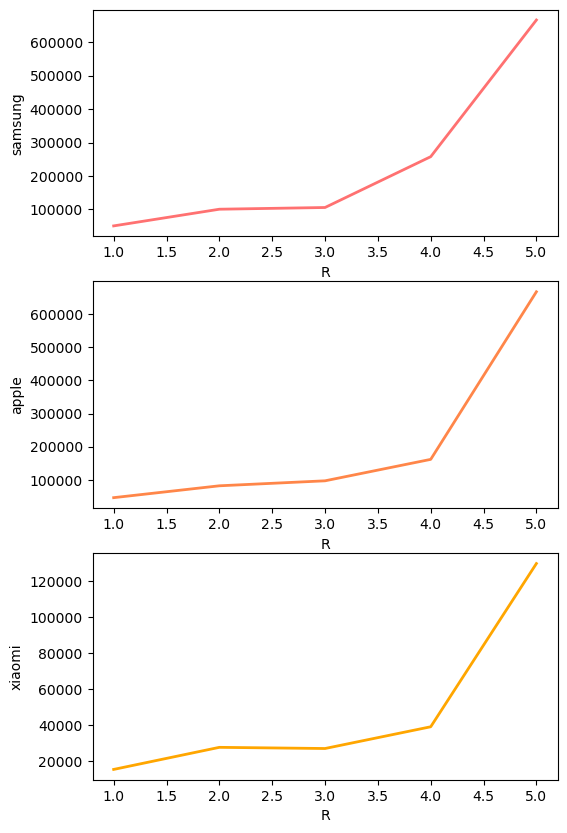

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
sns.lineplot(r_brand_3['samsung'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(r_brand_3['apple'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(r_brand_3['xiaomi'], ax=axes[2], color='#ffa600', linewidth='2');

- 3개의 브랜드 모두 우상향 하고 있습니다
- 대부분 가장 최근에 구매함

### F값 중 가장 큰 3개 카테고리 비교

In [60]:
f_brand = pd.pivot_table(data=rfm_category, index='F', columns='brand', values='frequency', aggfunc='sum')
f_columns_mean = f_brand.mean()
f_sorted_columns = f_columns_mean.sort_values(ascending=False)
f_brand = f_brand[f_sorted_columns.index]
f_brand_3 = f_brand.iloc[:,:3]

In [61]:
f_brand

brand,samsung,apple,xiaomi,huawei,lg,oppo,acer,artel,lenovo,indesit,...,jack,kakadu,ken,telefunken,kiddy,kona,teamgroup,tanglewood,liebherr,kampfer
F,,,,,,,,,,,,,,,,,,,,,
1,11234,9505,4673,1887,712,837,504,414,351,479,...,1,0,0,0,0,1,0,0,1,0
2,13216,9402,4325,2038,711,898,553,449,412,505,...,0,1,0,1,0,0,1,0,0,0
3,16097,8713,4029,2245,688,1047,481,512,433,445,...,0,0,1,0,1,0,0,1,0,1
4,44506,34061,12826,6290,2192,3032,1676,1297,1191,1514,...,0,0,0,0,0,0,0,0,0,0
5,1096200,992956,212913,97755,67835,43992,36941,30703,25255,18379,...,0,0,0,0,0,0,0,0,0,0


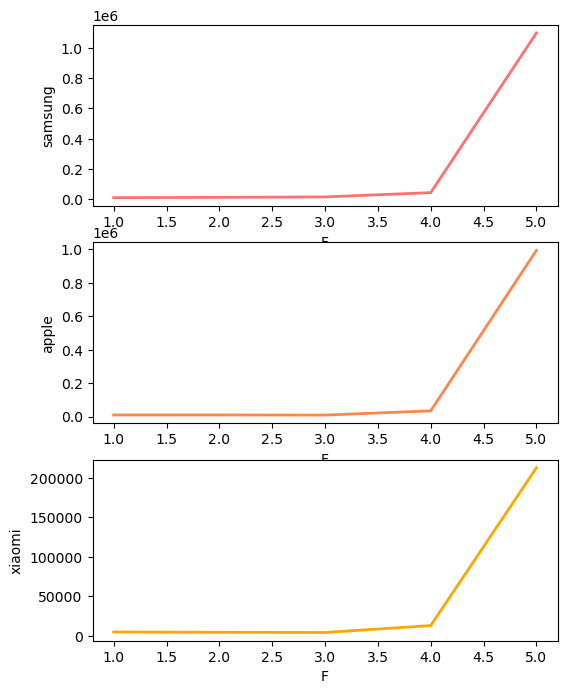

In [62]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(f_brand_3['samsung'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(f_brand_3['apple'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(f_brand_3['xiaomi'], ax=axes[2], color='#ffa600', linewidth='2');

- 모든 브랜드가 우상향
- 대부분 많은 사람들이 자주 구매함

### M값 중 가장 큰 3개 카테고리 비교

In [63]:
m_brand = pd.pivot_table(data=rfm_category, index='M', columns='brand', values='frequency', aggfunc='sum')
m_columns_mean = m_brand.mean()
m_sorted_columns = m_columns_mean.sort_values(ascending=False)
m_brand = m_brand[f_sorted_columns.index]
m_brand_3 = m_brand.iloc[:,:3]

f_brand = pd.pivot_table(data=rfm_category, index='F', columns='brand', values='frequency', aggfunc='sum')
f_columns_mean = f_brand.mean()
f_sorted_columns = f_columns_mean.sort_values(ascending=False)
f_brand = f_brand[f_sorted_columns.index]
f_brand_3 = f_brand.iloc[:,:3]

In [64]:
m_brand

brand,samsung,apple,xiaomi,huawei,lg,oppo,acer,artel,lenovo,indesit,...,jack,kakadu,ken,telefunken,kiddy,kona,teamgroup,tanglewood,liebherr,kampfer
M,,,,,,,,,,,,,,,,,,,,,
1,7888,279,6654,2171,238,128,53,816,185,0,...,0,1,1,1,0,0,1,0,0,1
2,20295,4802,10701,3198,354,2291,102,1198,82,804,...,0,0,0,0,1,0,0,0,0,0
3,42563,6202,10800,6743,1233,2999,750,1268,1029,1396,...,0,0,0,0,0,0,0,1,0,0
4,92129,30318,26334,13950,3730,6986,2656,2767,2310,2763,...,1,0,0,0,0,1,0,0,0,0
5,1018378,1013036,184277,84153,66583,37402,36594,27326,24036,16359,...,0,0,0,0,0,0,0,0,1,0


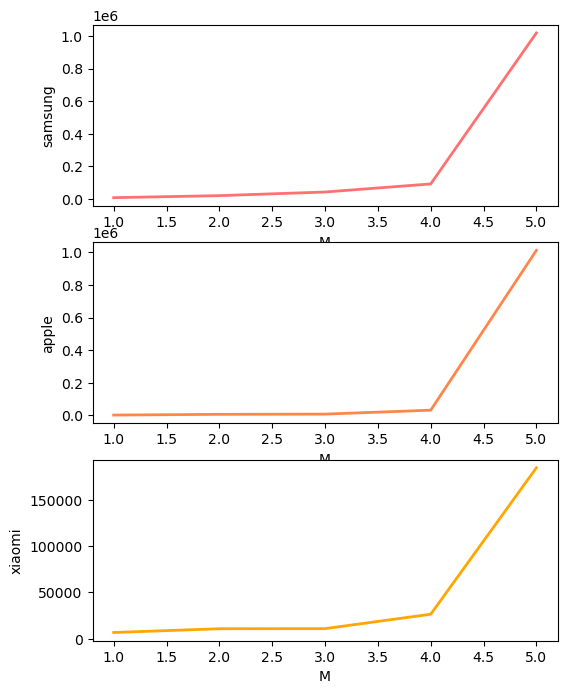

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
sns.lineplot(m_brand_3['samsung'], ax=axes[0], color='#ff7171', linewidth='2')
sns.lineplot(m_brand_3['apple'], ax=axes[1], color='#ff8649', linewidth='2')
sns.lineplot(m_brand_3['xiaomi'], ax=axes[2], color='#ffa600', linewidth='2');

- 특이하게 지출 내역을 비교했을 때 삼성은 중저가부터 고가까지 판매가 고루 이루어지고 평균 가격대가 높은 애플은 대부분 높은 지출 내역을 보입니다. 
- 반면 샤오미의 경우 높은 가격대의 상품에 대한 판매보다는 중저가 제품에 대한 판매가 주로 이루어 집니다.

### 브랜드 RFM class 비교

In [66]:
class_brand = pd.pivot_table(data=rfm_category, index='rfm_class',columns='brand', values='frequency', aggfunc='sum')

In [67]:
class_brand

brand,acer,acme,acqua,acron,acv,adagio,adamex,adata,adidas,adil,...,zanussi,zelmer,zeppelin,zeta,zinc,zlatek,zongshen,zoom,zotac,zte
rfm_class,,,,,,,,,,,,,,,,,,,,,
silver,516,15,1,0,4,0,9,17,32,1,...,0,27,11,258,1,48,0,1,2,54
gold,1464,22,0,3,0,0,17,46,32,0,...,5,20,10,344,0,65,2,0,6,75
platinum,38175,115,0,0,16,8,106,57,290,9,...,27,43,135,1636,0,256,0,0,0,953


In [68]:
class_brand_10 = class_brand[class_brand.mean().sort_values(ascending=False)[:10].index]

In [69]:
class_brand_10.style.background_gradient(cmap='Oranges')

brand,samsung,apple,xiaomi,huawei,lg,oppo,acer,artel,lenovo,indesit
rfm_class,,,,,,,,,,
silver,23610,7505,9851,4219,928,1620,516,1104,578,797
gold,48566,25793,15794,7534,2127,3371,1464,1611,1295,1449
platinum,1109077,1021339,213121,98462,69083,44815,38175,30660,25769,19076


In [70]:
class_brand_sample = class_brand.sample(n=15,axis=1)

In [71]:
class_brand_sample.style.background_gradient(cmap='Oranges')

brand,huion,alesis,gopro,lezard,ara,bluesonic,karya,yoya,scoole,xiaomi,suunto,roncato,gipfel,aqua,naranda
rfm_class,,,,,,,,,,,,,,,
silver,16,15,12,0,1,1,91,10,0,9851,2,0,0,83,1
gold,35,11,26,1,1,0,135,20,0,15794,2,3,1,62,0
platinum,429,115,453,3,0,0,1776,29,7,213121,3,12,0,519,15


In [72]:
class_brand['acer'].max()

38175

In [73]:
push_list = class_brand.transpose()
push_list

rfm_class,silver,gold,platinum
brand,,,
acer,516,1464,38175
acme,15,22,115
acqua,1,0,0
acron,0,3,0
acv,4,0,16
...,...,...,...
zlatek,48,65,256
zongshen,0,2,0
zoom,1,0,0


In [74]:
for i in range(1926) :
    push_list.iloc[i,:] = push_list.iloc[i,:].rank(method='first', ascending=False).astype(int)

IndexError: single positional indexer is out-of-bounds

In [ ]:
push_list

In [ ]:
push_list.iloc[:10,:].plot.barh(stacked=True)

In [ ]:
brand_platinum = push_list[push_list['platinum'] == 1].index.to_list()
brand_platinum[:10]

In [ ]:
brand_gold = push_list[push_list['gold'] == 1].index.to_list()
brand_gold[:10]

In [ ]:
brand_silver = push_list[push_list['silver'] == 1].index.to_list()
brand_silver[:10]